https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

https://www.cienciadedatos.net/documentos/37_clustering_y_heatmaps

In [9]:
from Database import db_mongo

import string

In [10]:
db = db_mongo.db_mongo()

db.insert_text({"text":"Text content"})

df = db.get_text(100000)

#df = df.sample(frac=1).reset_index(drop=True)

Init DB


In [11]:
all_text = list()
all_titles = df["class"].unique()

print(df)

for item in df["text"]:
   
    text = item.encode('utf8')
   
    nopunc = [word.replace('\n'," ").replace('\x0c'," ") for word in item if word not in string.punctuation]
       
    nopunc = ''.join(nopunc)
    
    all_text.append(nopunc.lower())

                                        _id  \
0      ee9c6ab0-02d3-4dbc-8ff6-374c02568e38   
1      d2a8dbed-8ea0-40b5-9cd4-2f374558154f   
2      c747b25a-e364-4d5a-85d4-7dd55cb5ad34   
3      3afdc747-4428-405d-a83b-cb1d08715268   
4      d2cf4171-b3b9-4fda-9199-2563ee67f48e   
...                                     ...   
33657  30625b5d-cf24-4b11-bfe2-a6b028288873   
33658  fc6419ba-c7be-4a3b-af8a-3ed99661fd9b   
33659  9c98b0ec-9d95-42e7-a6b4-5cf07d4d5dd2   
33660  ae779660-bc9a-433f-b251-499a9a9f3a05   
33661  5c451dd5-6622-4915-b110-4c8a78b7924b   

                                                    text        class  
0      Academic, ANSYS, AutoCAD, basic, CNC, Directio...  ENGINEERING  
1      Academic, ANSYS, AutoCAD, basic, CNC, Directio...  ENGINEERING  
2      08/2014 to 12/2014 Company Name\ne Sponsored b...  ENGINEERING  
3      Education\n\nMaster of Science : Mechanical En...  ENGINEERING  
4      e Sponsored by New York State Energy Research ...  ENGINEERING  
...

In [12]:
import pandas as pd

title=[]
for article in all_titles:
    #print("loading content: ",article)
    #wiki_lst.append(all_tes)
    title.append(article)
print("examine content")


examine content


In [13]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/kguttas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Limpiar Texto

In [15]:
import re

new_text = list()

for item in all_text:
    text = re.sub("s+"," ", item)
    new_text.append(text)
    
all_text = new_text.copy()

In [16]:
all_text[20]

' kill   accounting accrual  accrual acqui ition   treamline adp payroll ad a 400 balance  heet banking billing budget  budget bu ine  ca e bu ine  development bu ine  proce e  citrix clo ing con ulting corporate finance client  databa e  documentation driver  due diligence e ba e executive management  enior management fa t finance financial financial analy i  financial analy i  and reporting financial reporting foreca ting general ledger great plain  hyperion information technology inve tment  jd edward  managing mark market marketing meeting  acce  micro oft acce  m  acce  micro oft excel m  excel m  office  uite powerpoint modeling performance management policie  pricing proce e  quality record keeping reporting re earch  ap  ql  tati tic   '

In [17]:
import string

new_text = list()

for item in all_text:
    text = "".join([i for i in item if i not in string.punctuation])
    new_text.append(text)
    
all_text = new_text.copy()

In [18]:
all_text[20]

' kill   accounting accrual  accrual acqui ition   treamline adp payroll ad a 400 balance  heet banking billing budget  budget bu ine  ca e bu ine  development bu ine  proce e  citrix clo ing con ulting corporate finance client  databa e  documentation driver  due diligence e ba e executive management  enior management fa t finance financial financial analy i  financial analy i  and reporting financial reporting foreca ting general ledger great plain  hyperion information technology inve tment  jd edward  managing mark market marketing meeting  acce  micro oft acce  m  acce  micro oft excel m  excel m  office  uite powerpoint modeling performance management policie  pricing proce e  quality record keeping reporting re earch  ap  ql  tati tic   '

In [19]:
import string

new_text = list()

for item in all_text:
    text = "".join([i.lower() for i in item if i not in string.punctuation])
    new_text.append(text)
    
all_text = new_text.copy()

In [20]:
all_text[20]

' kill   accounting accrual  accrual acqui ition   treamline adp payroll ad a 400 balance  heet banking billing budget  budget bu ine  ca e bu ine  development bu ine  proce e  citrix clo ing con ulting corporate finance client  databa e  documentation driver  due diligence e ba e executive management  enior management fa t finance financial financial analy i  financial analy i  and reporting financial reporting foreca ting general ledger great plain  hyperion information technology inve tment  jd edward  managing mark market marketing meeting  acce  micro oft acce  m  acce  micro oft excel m  excel m  office  uite powerpoint modeling performance management policie  pricing proce e  quality record keeping reporting re earch  ap  ql  tati tic   '

In [21]:
ps = nltk.PorterStemmer()
new_text = [ps.stem(word) for word in all_text]

all_text = new_text.copy()

In [22]:
all_text[20]

' kill   accounting accrual  accrual acqui ition   treamline adp payroll ad a 400 balance  heet banking billing budget  budget bu ine  ca e bu ine  development bu ine  proce e  citrix clo ing con ulting corporate finance client  databa e  documentation driver  due diligence e ba e executive management  enior management fa t finance financial financial analy i  financial analy i  and reporting financial reporting foreca ting general ledger great plain  hyperion information technology inve tment  jd edward  managing mark market marketing meeting  acce  micro oft acce  m  acce  micro oft excel m  excel m  office  uite powerpoint modeling performance management policie  pricing proce e  quality record keeping reporting re earch  ap  ql  tati tic   '

In [23]:
wn = nltk.WordNetLemmatizer()

new_text = [wn.lemmatize(word) for word in all_text]
all_text = new_text.copy()

In [24]:
all_text[20]

' kill   accounting accrual  accrual acqui ition   treamline adp payroll ad a 400 balance  heet banking billing budget  budget bu ine  ca e bu ine  development bu ine  proce e  citrix clo ing con ulting corporate finance client  databa e  documentation driver  due diligence e ba e executive management  enior management fa t finance financial financial analy i  financial analy i  and reporting financial reporting foreca ting general ledger great plain  hyperion information technology inve tment  jd edward  managing mark market marketing meeting  acce  micro oft acce  m  acce  micro oft excel m  excel m  office  uite powerpoint modeling performance management policie  pricing proce e  quality record keeping reporting re earch  ap  ql  tati tic   '

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3),
                    max_df=0.6, min_df=0.1, max_features=50000)
%time tfidf_matrix = tfidf_vectorizer.fit_transform(all_text) 

print(tfidf_matrix.shape)

X = tfidf_matrix

CPU times: user 10.4 s, sys: 471 ms, total: 10.9 s
Wall time: 10.9 s
(33662, 68)


In [59]:
print(tfidf_vectorizer.get_feature_names())
print(X.shape)

['account', 'ale', 'analy', 'ba', 'bu', 'bu ine', 'city', 'city tate', 'client', 'communication', 'company', 'company city', 'company city tate', 'cu', 'cu tomer', 'cu tomer ervice', 'current', 'development', 'di', 'ed', 'education', 'employee', 'en', 'ervice', 'experience', 'hip', 'including', 'ine', 'information', 'ing', 'ion', 'ional', 'ity', 'kill', 'leader', 'management', 'manager', 'marketing', 'micro', 'micro oft', 'new', 'office', 'oft', 'operation', 'po', 'pon', 'pre', 'proce', 'product', 'profe', 'profe ional', 'program', 'project', 'quality', 'relation', 'report', 'tate', 'team', 'tem', 'ting', 'tomer', 'tomer ervice', 'univer', 'univer ity', 'upport', 'ure', 'work', 'year']
(33662, 68)


In [60]:
print(X)

  (0, 39)	0.34901372127227115
  (0, 58)	0.2954638901125991
  (0, 41)	0.3080154741260349
  (0, 42)	0.342059026589303
  (0, 38)	0.6890927431497708
  (0, 3)	0.32274416086000346
  (1, 39)	0.34901372127227115
  (1, 58)	0.2954638901125991
  (1, 41)	0.3080154741260349
  (1, 42)	0.342059026589303
  (1, 38)	0.6890927431497708
  (1, 3)	0.32274416086000346
  (2, 63)	0.16864964513340053
  (2, 48)	0.08502958523345074
  (2, 32)	0.1631569278770466
  (2, 62)	0.16675910359859034
  (2, 20)	0.07385948488254766
  (2, 43)	0.08452225012204358
  (2, 55)	0.08576108031343906
  (2, 22)	0.32722949751000047
  (2, 52)	0.07371334884199186
  (2, 30)	0.1496248751259661
  (2, 46)	0.3874341475241414
  (2, 13)	0.19342060219246093
  (2, 18)	0.23187697856375197
  :	:
  (33637, 45)	0.19467873589438006
  (33638, 15)	0.2134219175443208
  (33638, 61)	0.21299120916397107
  (33638, 14)	0.16586207714825063
  (33638, 60)	0.16564493401452443
  (33638, 9)	0.19798467566953476
  (33638, 25)	0.17507444560082766
  (33638, 34)	0.2036998

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

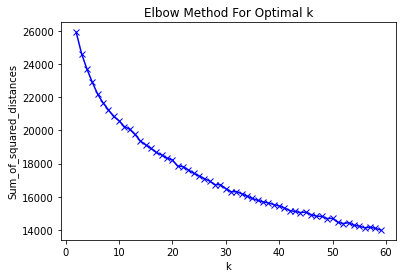

In [62]:
Sum_of_squared_distances = []
K = range(2,60)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                     title  cluster
0              ENGINEERING        0
22            CONSTRUCTION        0
20             AGRICULTURE        0
19    BUSINESS-DEVELOPMENT        0
18        PUBLIC-RELATIONS        0
17              ACCOUNTANT        0
23                     BPO        0
11                 TEACHER        0
9                     ARTS        0
24                     NaN        0
6            DIGITAL-MEDIA        0
3                     CHEF        0
1                  BANKING        0
14                ADVOCATE        2
16                   SALES        2
4                  FINANCE        3
10                 FITNESS        6
7               AUTOMOBILE        6
8                 AVIATION        6
12              HEALTHCARE        6
2               CONSULTANT       13
15                      HR       14
13                 APPAREL       21
5   INFORMATION-TECHNOLOGY       28
21                DESIGNER       28


Cluster: 0
Titles
         ENGINEERING
             BANKING
                CHEF
       DIGITAL-MEDIA
                ARTS
             TEACHER
          ACCOUNTANT
    PUBLIC-RELATIONS
BUSINESS-DEVELOPMENT
         AGRICULTURE
        CONSTRUCTION
                 BPO
                 NaN


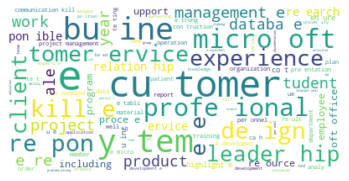

Cluster: 1
Titles
Series([], )


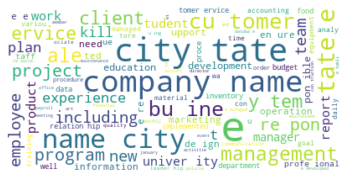

Cluster: 2
Titles
ADVOCATE
   SALES


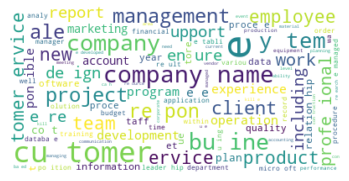

Cluster: 3
Titles
FINANCE


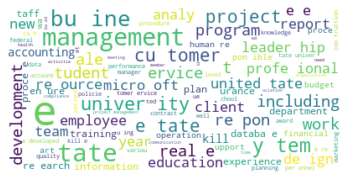

Cluster: 4
Titles
Series([], )


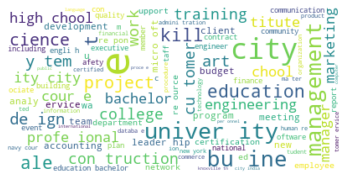

Cluster: 5
Titles
Series([], )


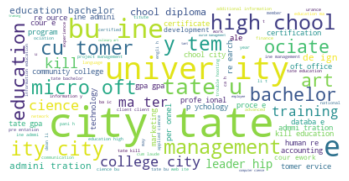

Cluster: 6
Titles
AUTOMOBILE
  AVIATION
   FITNESS
HEALTHCARE


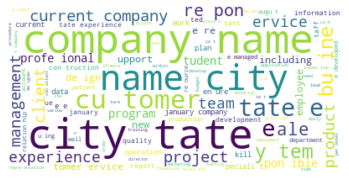

Cluster: 7
Titles
Series([], )


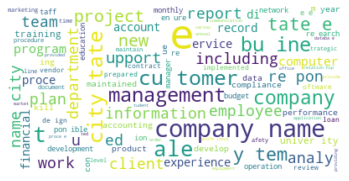

Cluster: 8
Titles
Series([], )


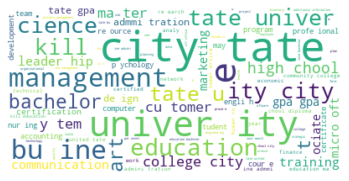

Cluster: 9
Titles
Series([], )


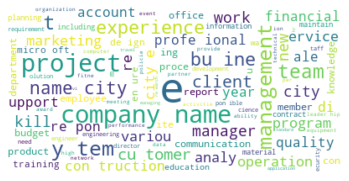

Cluster: 10
Titles
Series([], )


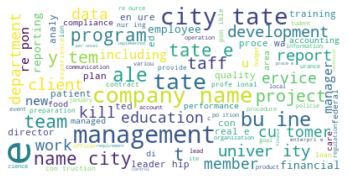

Cluster: 11
Titles
Series([], )


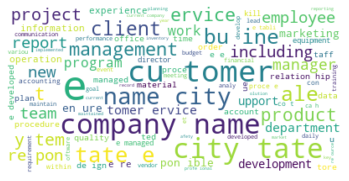

Cluster: 12
Titles
Series([], )


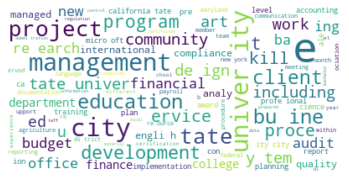

Cluster: 13
Titles
CONSULTANT


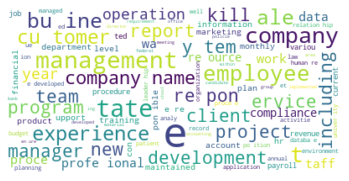

Cluster: 14
Titles
HR


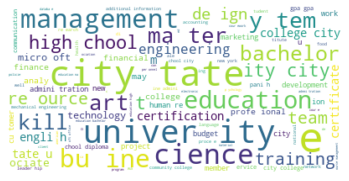

Cluster: 15
Titles
Series([], )


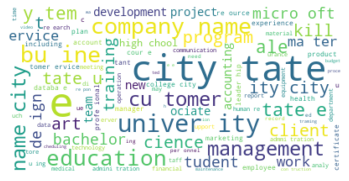

Cluster: 16
Titles
Series([], )


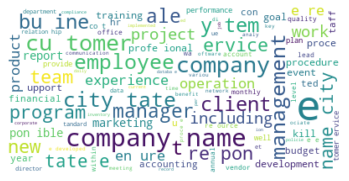

Cluster: 17
Titles
Series([], )


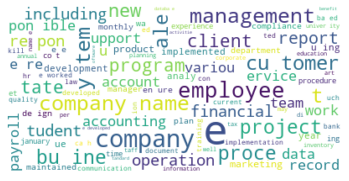

Cluster: 18
Titles
Series([], )


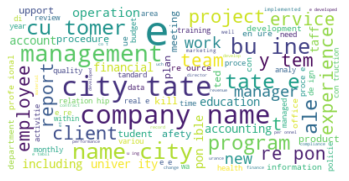

Cluster: 19
Titles
Series([], )


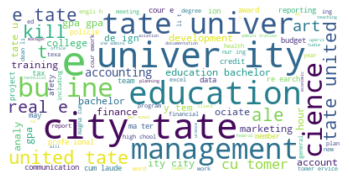

Cluster: 20
Titles
Series([], )


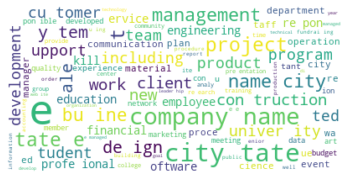

Cluster: 21
Titles
APPAREL


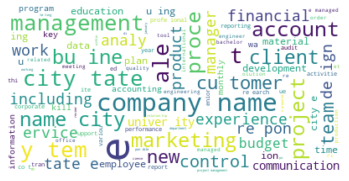

Cluster: 22
Titles
Series([], )


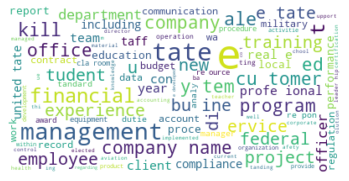

Cluster: 23
Titles
Series([], )


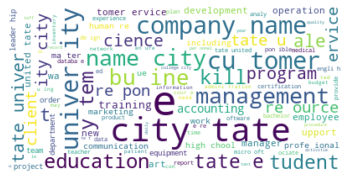

Cluster: 24
Titles
Series([], )


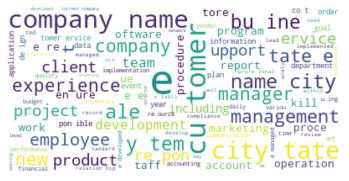

Cluster: 25
Titles
Series([], )


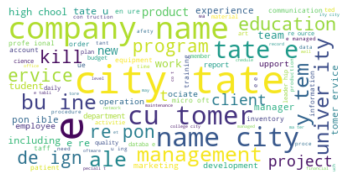

Cluster: 26
Titles
Series([], )


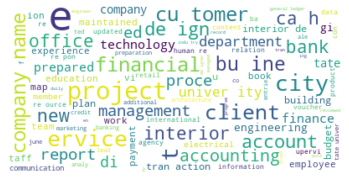

Cluster: 27
Titles
Series([], )


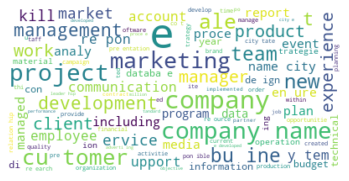

Cluster: 28
Titles
INFORMATION-TECHNOLOGY
              DESIGNER


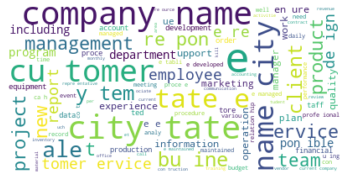

Cluster: 29
Titles
Series([], )


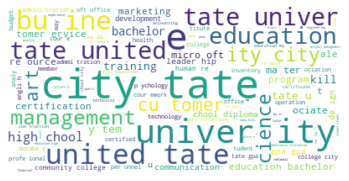

In [52]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':all_text}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [53]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

In [54]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 tate
 company
 city tate
 city
Cluster 1:
 tate
 city
 city tate
 company
Cluster 2:
 company
 city
 tate
 city tate
Cluster 3:
 tate
 city
 city tate
 company
Cluster 4:
 city
 company
 tate
 city tate
Cluster 5:
 city tate
 city
 tate
 company
Cluster 6:
 city tate
 company
 city
 tate
Cluster 7:
 company
 tate
 city
 city tate
Cluster 8:
 tate
 city
 city tate
 company
Cluster 9:
 city
 company
 tate
 city tate
Cluster 10:
 tate
 city tate
 city
 company
Cluster 11:
 company
 city tate
 city
 tate
Cluster 12:
 tate
 city
 city tate
 company
Cluster 13:
 company
 tate
 city
 city tate
Cluster 14:
 city
 city tate
 tate
 company
Cluster 15:
 city
 city tate
 tate
 company
Cluster 16:
 company
 tate
 city tate
 city
Cluster 17:
 company
 tate
 city
 city tate
Cluster 18:
 tate
 company
 city
 city tate
Cluster 19:
 tate
 city
 city tate
 company
Cluster 20:
 city
 city tate
 tate
 company
Cluster 21:
 company
 city
 city tate
 tate
Cluster 22:
 tate
 company
 city
 city tat

In [55]:
pred_text = ['development.']

In [56]:
%time tfidf_matrix_pred = tfidf_vectorizer.transform(pred_text) #fit the vectorizer to synopses

CPU times: user 661 µs, sys: 110 µs, total: 771 µs
Wall time: 714 µs


In [57]:
# predict cluster labels for new dataset
cluster = model.predict(tfidf_matrix_pred)[0]

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
print(model.labels_)




print("Text belongs to cluster number {0}".format(cluster))

[ 0  0 13 ...  0  0  0]
Text belongs to cluster number 0


In [ ]:
print(cluster)

In [ ]:
for ind in order_centroids[cluster, :10]:
    print(' %s' % terms[ind])